In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default/Loan_default.csv


In [2]:
data = pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

In [3]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
#checking for duplicate columns
data.duplicated().sum()

0

In [6]:
#checking for the null values
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

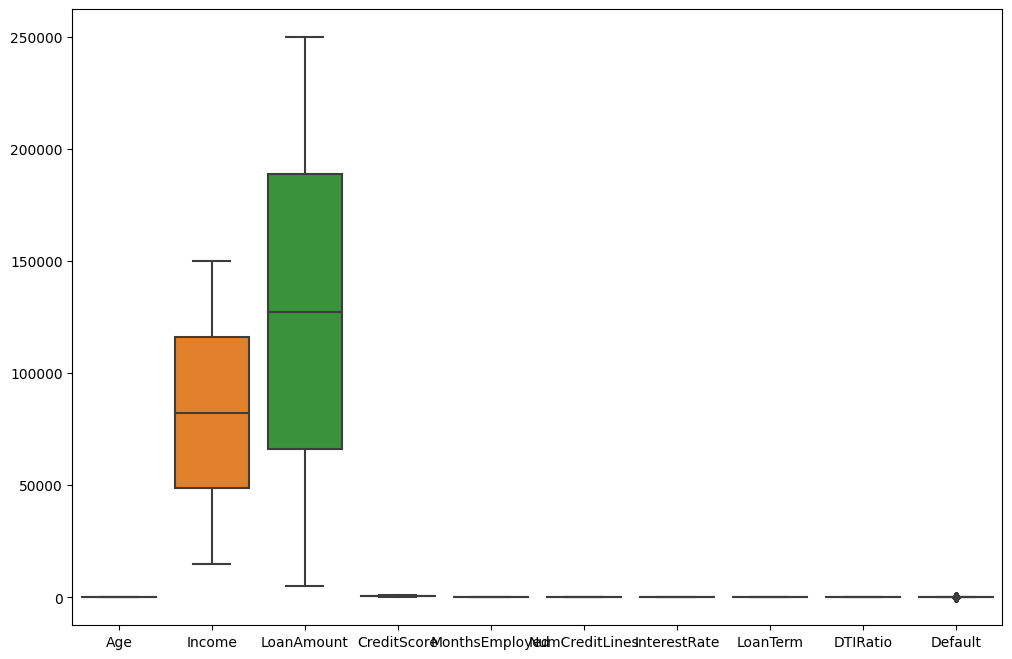

In [8]:
#Addressing Outliers
plt.figure(figsize=(12,8))
sns.boxplot(data)

<Axes: xlabel='Default', ylabel='count'>

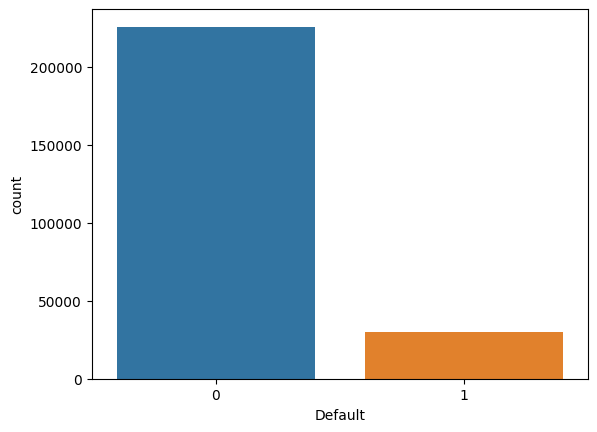

In [9]:
sns.countplot(data=data, x = 'Default')

In [10]:
corr = data.select_dtypes(['int64','float64']).corr()

<Axes: >

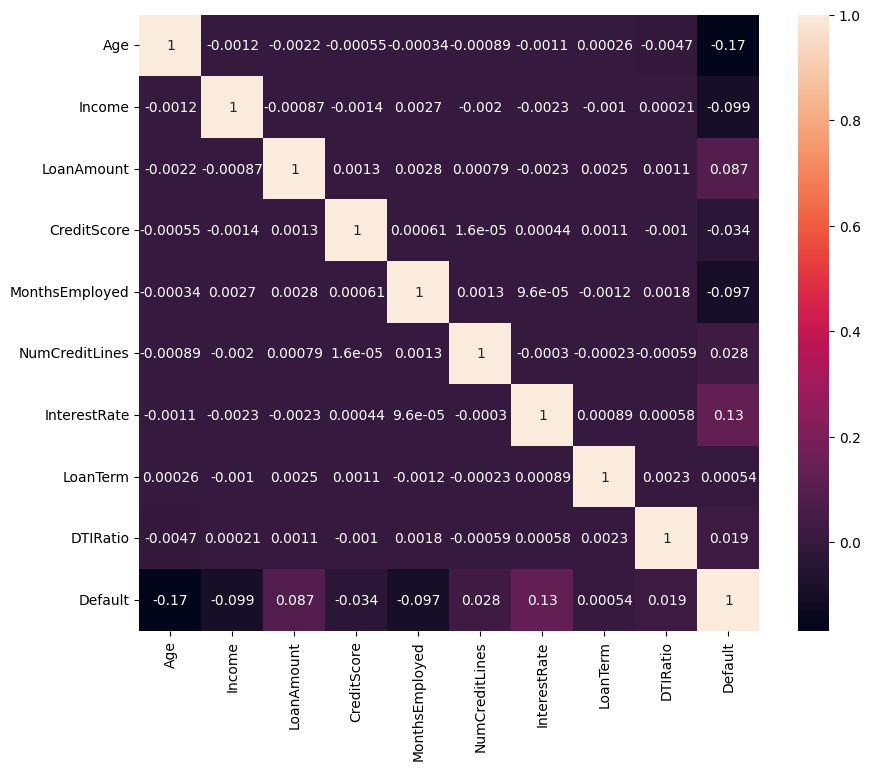

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True)

In [12]:
corr

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [13]:
data.drop(['LoanID', 'Education', 'MaritalStatus','LoanTerm'],axis=1, inplace=True)

In [14]:
X = data.drop(['Default'], axis=1)
y = data['Default']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size=0.30)

In [17]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,EmploymentType,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
67000,30,98335,77792,608,36,3,18.95,0.21,Unemployed,No,No,Business,Yes
139945,46,69994,27119,373,38,3,2.18,0.12,Full-time,Yes,No,Education,No
54147,29,69456,154928,650,102,4,6.84,0.38,Part-time,No,No,Home,Yes
14329,38,134766,215183,468,104,4,17.03,0.41,Self-employed,No,No,Education,No
16219,44,67044,132672,711,56,4,4.02,0.87,Full-time,Yes,No,Home,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,27,136956,24738,682,93,4,18.32,0.18,Self-employed,No,Yes,Auto,Yes
17730,28,42270,202156,360,5,2,2.10,0.56,Unemployed,Yes,No,Education,Yes
28030,67,28454,59858,336,20,1,5.32,0.40,Unemployed,Yes,No,Education,Yes
15725,38,114277,61440,644,42,3,18.87,0.20,Unemployed,No,Yes,Business,Yes


In [18]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(['object']).columns

In [19]:
num_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio'],
      dtype='object')

In [20]:
# Data Transformation:
#Normalization and standardization
#Feature scaling
#Encoding categorical variables

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
Scaler = StandardScaler()
OHE = OneHotEncoder(handle_unknown = 'ignore')

In [23]:
X_train_std = Scaler.fit_transform(X_train[num_cols])
X_train_ohe = OHE.fit_transform(X_train[cat_cols]).toarray()

In [24]:
train = np.concatenate((X_train_std, X_train_ohe), axis=1)

In [25]:
train.shape

(178742, 23)

In [26]:
X_test_std = Scaler.transform(X_test[num_cols])
X_test_ohe = OHE.transform(X_test[cat_cols]).toarray()

In [27]:
test = np.concatenate((X_test_std, X_test_ohe), axis=1)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()

In [30]:
LR.fit(train, y_train)

LogisticRegression()

In [31]:
LRT_pred = LR.predict(train)

In [32]:
LR_pred = LR.predict(test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [34]:
def metrics_(yTr, yTp, yts, ytp):
    print('<<<<<< Train >>>>>>')
    print('confusion_matrix :\n', confusion_matrix(yTr, yTp))
    print('Accuracy :', accuracy_score(yTr, yTp))
    print('precision_score :', precision_score(yTr, yTp))
    print('recall_score :', recall_score(yTr, yTp))
    print('\n')
    print('<<<<<< Test >>>>>>')
    print('confusion_matrix :\n', confusion_matrix(yts, ytp))
    print('Accuracy :', accuracy_score(yts, ytp))
    print('precision_score :', precision_score(yts, ytp))
    print('recall_score :', recall_score(yts, ytp))

In [35]:
print('<<<<<< Lgistic Regression >>>>>>\n')
metrics_(y_train, LRT_pred, y_test, LR_pred)

<<<<<< Lgistic Regression >>>>>>

<<<<<< Train >>>>>>
confusion_matrix :
 [[157614    435]
 [ 20055    638]]
Accuracy : 0.8853654988754741
precision_score : 0.5945945945945946
recall_score : 0.03083168221137583


<<<<<< Test >>>>>>
confusion_matrix :
 [[67444   201]
 [ 8693   267]]
Accuracy : 0.8838979178904771
precision_score : 0.5705128205128205
recall_score : 0.029799107142857145


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(train, y_train)
dtc_TPred = dtc.predict(train)
dtc_tpred = dtc.predict(test)

In [38]:
print('<<<<<< Decision Tree Classifier >>>>>>\n')
metrics_(y_train, dtc_TPred, y_test, dtc_tpred)

<<<<<< Decision Tree Classifier >>>>>>

<<<<<< Train >>>>>>
confusion_matrix :
 [[158049      0]
 [     0  20693]]
Accuracy : 1.0
precision_score : 1.0
recall_score : 1.0


<<<<<< Test >>>>>>
confusion_matrix :
 [[59290  8355]
 [ 6910  2050]]
Accuracy : 0.800731022779192
precision_score : 0.19702066314271985
recall_score : 0.22879464285714285


In [39]:
dtc.get_depth()

38

In [40]:
dtc.min_samples_split

2

In [41]:
dtc.min_samples_leaf

1

In [42]:
y_train.value_counts()

Default
0    158049
1     20693
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(train, y_train)

# Check the balance of the target variable after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Concatenate the resampled features with the original target variable
#resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

Class distribution after SMOTE:
Default
0    158049
1    158049
Name: count, dtype: int64


In [45]:
X_resampled.shape

(316098, 23)

In [46]:
dec = DecisionTreeClassifier()

In [47]:
dec.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [48]:
dec_train = dec.predict(X_resampled)
dec_pred = dec.predict(test)
metrics_(y_resampled, dec_train, y_test, dec_pred)

<<<<<< Train >>>>>>
confusion_matrix :
 [[158049      0]
 [     0 158049]]
Accuracy : 1.0
precision_score : 1.0
recall_score : 1.0


<<<<<< Test >>>>>>
confusion_matrix :
 [[56240 11405]
 [ 6217  2743]]
Accuracy : 0.7699627961621304
precision_score : 0.1938789934973141
recall_score : 0.30613839285714284


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RFC = RandomForestClassifier()

In [51]:
RFC.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [52]:
RFC_train = RFC.predict(X_resampled) 
RFC_test =  RFC.predict(test)

In [53]:
metrics_(y_resampled, RFC_train, y_test, RFC_test)

<<<<<< Train >>>>>>
confusion_matrix :
 [[158049      0]
 [     0 158049]]
Accuracy : 1.0
precision_score : 1.0
recall_score : 1.0


<<<<<< Test >>>>>>
confusion_matrix :
 [[64062  3583]
 [ 7053  1907]]
Accuracy : 0.8611578878663273
precision_score : 0.34735883424408015
recall_score : 0.21283482142857144


In [54]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}